# 1. Data Preprocess

1. Import Packages; 
2. Data Loading; 
3. Data Overview;
4. Data Cleansing for Further Prediction

In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd       # to store and process data in dataframe
import numpy as np        # for numerical analysis

import matplotlib.pyplot as plt      # basic visualization package
import matplotlib.colors as mcolors
import seaborn as sns      # advanced ploting
import random
import math
import time
import datetime
from numpy import nan as NA

# Load specific forecasting tools
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # for determining (p,q) orders
import pmdarima as pm
from pmdarima import auto_arima # for determining ARIMA orders

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.svm import SVR

import operator 
plt.style.use('seaborn-poster')
%matplotlib inline
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('retina')

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#pio.write_html(fig, file="index.html", auto_open=True)

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
latest_data = pd.read_csv('csse_covid_19_daily_reports_08-22-2022.csv')
us_data = pd.read_csv('csse_covid_19_daily_reports_us_08-22-2022.csv')

In [4]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-08-23 04:20:56,33.93911,67.709953,191040,7767,NaN,NaN,Afghanistan,490.747859,4.065641
1,NaN,NaN,NaN,Albania,2022-08-23 04:20:56,41.15330,20.168300,326181,3576,NaN,NaN,Albania,11334.387379,1.096324
2,NaN,NaN,NaN,Algeria,2022-08-23 04:20:56,28.03390,1.659600,269894,6878,NaN,NaN,Algeria,615.479089,2.548408
3,NaN,NaN,NaN,Andorra,2022-08-23 04:20:56,42.50630,1.521800,45975,154,NaN,NaN,Andorra,59503.009124,0.334965
4,NaN,NaN,NaN,Angola,2022-08-23 04:20:56,-11.20270,17.873900,102636,1917,NaN,NaN,Angola,312.283707,1.867766


In [5]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/14/22,8/15/22,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22,8/23/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,189045,189343,189477,189710,190010,190254,190435,190643,191040,191247
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,321804,322125,322837,323282,323829,325241,325736,326077,326181,326787
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,269141,269269,269381,269473,269556,269650,269731,269805,269894,269971
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45899,45899,45899,45975,45975,45975,45975,45975,45975,45975
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636


In [6]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/14/22,8/15/22,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22,8/23/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7758,7759,7759,7759,7759,7759,7759,7762,7767,7768
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3571,3571,3573,3574,3574,3575,3576,3576,3576,3577
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6878,6878,6878,6878,6878,6878,6878,6878,6878,6878
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,154,154,154,154,154,154,154,154,154,154
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917


In [7]:
us_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2022-08-23 04:32:57,32.3182,-86.9023,1463933,20041,NaN,NaN,1.0,29856.776769,8115030.0,NaN,1.368983,84000001.0,USA,165505.278712,NaN
1,Alaska,US,2022-08-23 04:32:57,61.3707,-152.4044,290881,1330,NaN,NaN,2.0,39762.557327,NaN,NaN,0.457232,84000002.0,USA,NaN,NaN
2,American Samoa,US,2022-08-23 04:32:57,-14.2710,-170.1320,8042,33,NaN,NaN,60.0,14453.370716,NaN,NaN,0.410346,16.0,ASM,NaN,NaN
3,Arizona,US,2022-08-23 04:32:57,33.7298,-111.4312,2237208,30982,NaN,NaN,4.0,30736.295971,20513863.0,NaN,1.384851,84000004.0,USA,281833.501701,NaN
4,Arkansas,US,2022-08-23 04:32:57,34.9697,-92.3731,923512,11861,NaN,NaN,5.0,30602.119952,5426573.0,NaN,1.284336,84000005.0,USA,179818.603196,NaN


In [8]:
cols = confirmed_df.keys()
print(cols)
# get rid of the first 4 columns, get all the dates data only
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]

dates = confirmed.keys()
world_cases = []
total_deaths = [] 
fatality_rate = []

# for loop to sum and divide to get rates for use afterward
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    
    # calculate fatality rates
    fatality_rate.append(death_sum/confirmed_sum)


Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '8/14/22', '8/15/22', '8/16/22', '8/17/22', '8/18/22', '8/19/22',
       '8/20/22', '8/21/22', '8/22/22', '8/23/22'],
      dtype='object', length=949)


In [9]:
# for loop the data to get daily_increase and moving_average function for further calculation
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# set the window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)


In [10]:
days_since = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)

# 2. Covid-19 Trend Visualization
### Covid-19 Virus With Numbers
1. Confirmed -- Cumulative number of confirmed cases till that date
2. Deaths -- Cumulative number of of deaths till that date
3. Recovered -- Cumulative number of recovered cases till that date
4. Active -- Active Cases
5. Recovered Cases Rate % -- rate of Recovered Cases from total of Confirmed cases in same Country
6. Deaths Cases Rate % -- rate of death Cases from total of Confirmed cases in same Country
7. Total Cases Rate % -- rate of total cases from Total cases in the world

In [11]:
latest_data.rename(columns={'Last_Update':'Date', 'Country_Region':'Country'}, inplace=True)
latest_data.head()

,FIPS,Admin2,Province_State,Country,Date,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-08-23 04:20:56,33.93911,67.709953,191040,7767,NaN,NaN,Afghanistan,490.747859,4.065641
1,NaN,NaN,NaN,Albania,2022-08-23 04:20:56,41.15330,20.168300,326181,3576,NaN,NaN,Albania,11334.387379,1.096324
2,NaN,NaN,NaN,Algeria,2022-08-23 04:20:56,28.03390,1.659600,269894,6878,NaN,NaN,Algeria,615.479089,2.548408
3,NaN,NaN,NaN,Andorra,2022-08-23 04:20:56,42.50630,1.521800,45975,154,NaN,NaN,Andorra,59503.009124,0.334965
4,NaN,NaN,NaN,Angola,2022-08-23 04:20:56,-11.20270,17.873900,102636,1917,NaN,NaN,Angola,312.283707,1.867766


In [12]:
#Missing Values
latest_data.isnull().sum().to_frame('nulls')

,nulls
FIPS,744
Admin2,740
Province_State,177
Country,0
Date,0
Lat,91
Long_,91
Confirmed,0
Deaths,0
Recovered,4012


In [13]:
df = latest_data.groupby(["Date", "Country"])[['Date', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
sorted_By_Confirmed=df.sort_values('Confirmed',ascending=False)
sorted_By_Confirmed=sorted_By_Confirmed.drop_duplicates('Country')

world_Confirmed_Total=sorted_By_Confirmed['Confirmed'].sum()
world_Deaths_Total=sorted_By_Confirmed['Deaths'].sum()
world_Recovered_Total=sorted_By_Confirmed['Recovered'].sum()

Active=world_Confirmed_Total-world_Deaths_Total-world_Recovered_Total

world_Deaths_rate=(world_Deaths_Total*100)/world_Confirmed_Total
world_Recovered_rate=(world_Recovered_Total*100)/world_Confirmed_Total

In [52]:
# Top countries sorted by the Confirmed Cases
Recovered_rate=(sorted_By_Confirmed['Recovered']*100)/sorted_By_Confirmed['Confirmed']
Deaths_rate=(sorted_By_Confirmed['Deaths']*100)/sorted_By_Confirmed['Confirmed']
cases_rate=(sorted_By_Confirmed.Confirmed*100)/world_Confirmed_Total

sorted_By_Confirmed['Active']=sorted_By_Confirmed['Confirmed']-sorted_By_Confirmed['Deaths']-sorted_By_Confirmed['Recovered']
sorted_By_Confirmed['Recovered Cases Rate %']=pd.DataFrame(Recovered_rate)
sorted_By_Confirmed['Deaths Cases Rate %']=pd.DataFrame(Deaths_rate)
sorted_By_Confirmed['Total Cases Rate %']=pd.DataFrame(cases_rate)


print("Sorted By Confirmed Cases")
sorted_By_Confirmed.style.background_gradient(cmap='Reds')

Sorted By Confirmed Cases


,Date,Country,Confirmed,Deaths,Recovered,Active,Recovered Cases Rate %,Deaths Cases Rate %,Total Cases Rate %
192,2022-08-23 04:20:56,US,93623307,1040895,0.000000,92582412.000000,0.000000,1.111790,15.688674
88,2022-08-23 04:20:56,India,44357546,527416,0.000000,43830130.000000,0.000000,1.189011,7.433096
71,2022-08-23 04:20:56,France,34573992,154657,0.000000,34419335.000000,0.000000,0.447322,5.793644
32,2022-08-23 04:20:56,Brazil,34284864,682549,0.000000,33602315.000000,0.000000,1.990817,5.745194
75,2022-08-23 04:20:56,Germany,31868639,146650,0.000000,31721989.000000,0.000000,0.460170,5.340301
196,2022-08-23 04:20:56,United Kingdom,23675741,187731,0.000000,23488010.000000,0.000000,0.792926,3.967399
102,2022-08-23 04:20:56,"Korea, South",22449475,26161,0.000000,22423314.000000,0.000000,0.116533,3.761910
94,2022-08-23 04:20:56,Italy,21660885,174797,0.000000,21486088.000000,0.000000,0.806971,3.629764
154,2022-08-23 04:20:56,Russia,18871701,375845,0.000000,18495856.000000,0.000000,1.991580,3.162374
96,2022-08-23 04:20:56,Japan,17324714,37300,0.000000,17287414.000000,0.000000,0.215299,2.903142


### Cases Rate per country of total cases Globally

cases rate per country of total cases in the world 


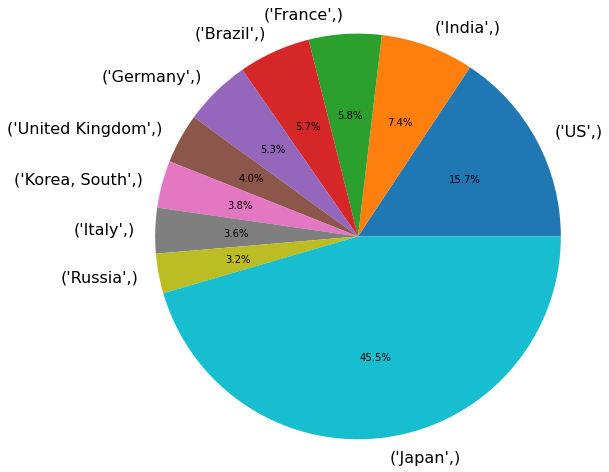

In [53]:
Top7=sorted_By_Confirmed.iloc[0:9,-1].values
others=sorted_By_Confirmed.iloc[9:,-1].sum()
x=np.array(Top7)
x2=np.array(others)
rates=np.concatenate((x, x2), axis=None)

rate_perCountry=pd.DataFrame(data=rates,index=[sorted_By_Confirmed['Country'].head(10)] ,columns=['rate'])
rate_perCountry.rename(index={'Turkey': "other Countries"},inplace=True)


labels=rate_perCountry.index
sizes=rate_perCountry['rate'].values

explode = None  # explode 1st slice
plt.subplots(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=False, startangle=0)
plt.axis('equal')
print("cases rate per country of total cases in the world ")
plt.show()

# 3. Predictions for confirmed coronavirus cases Globally 
#### Using confirmed cases data, fit ARIMA model to predict future covid cases on a global level.
1. Exploratory data analysis
2. ARIMA Model Building and Prediction

### 1. Exploratory data analysis

#### Confirmed and Deaths Cases Globally

In [54]:
# EDA Data(Exploratory data analysis)
forecast1 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')

EDA_dates = []
for i in range(len(forecast1)):
    EDA_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y')) 

eda_world_cases = pd.DataFrame(world_cases)
eda_total_deaths = pd.DataFrame(total_deaths)
eda_dates = pd.DataFrame(EDA_dates)
eda_data1 = pd.concat([eda_world_cases, eda_total_deaths], axis = 1, join = 'inner')
eda_data = pd.concat([eda_data1, eda_dates], axis = 1, join = 'inner')
eda_data.columns = ['Confirmed', 'Deaths', 'Dates']
print(eda_data)

px.bar(data_frame=eda_data, y=['Confirmed','Deaths'],x='Dates',title = '<b>Confirmed and Deaths Cases Globally<b>')

     Confirmed   Deaths       Dates
0          557       17  01/22/2020
1          657       18  01/23/2020
2          944       26  01/24/2020
3         1437       42  01/25/2020
4         2120       56  01/26/2020
..         ...      ...         ...
940  594996434  6672755  08/19/2022
941  595567623  6673820  08/20/2022
942  596049571  6675463  08/21/2022
943  596762386  6455144  08/22/2022
944  597669988  6457872  08/23/2022

[945 rows x 3 columns]


#### Confirmed and Fatality Rate of each Country/Region

In [55]:
# Create country_region plot
country = latest_data[latest_data['Date']==latest_data['Date'].max()].sort_values(by='Confirmed',ascending=False)
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=country['Country'], y=country['Confirmed'], name="Confirmed"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=country['Country'], y=country['Case_Fatality_Ratio'], name="Case_Fatality_Ratio"),
    secondary_y=True,
)
# Add figure title
fig.update_layout(
    title_text="<b>Confirmed and Fatality Rate of each Country/Region<b>(Feel free to zoom in)"
)

# Set x-axis title
fig.update_xaxes(title_text="Country")

# Set y-axes titles
fig.update_yaxes(title_text="Confirmed", secondary_y=False)
fig.update_yaxes(title_text="Case_Fatality_Ratio", secondary_y=True)

fig.show()

#### Confirmed COVID-19 cases by country

In [56]:
country2 = latest_data.fillna('NA').groupby(['Country','Province_State','Date'])['Confirmed'].sum() \
                          .groupby(['Country','Province_State']).max().sort_values() \
                          .groupby(['Country']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(country2).head(10)
top10
fig = px.bar(top10, x=top10.index, y='Confirmed', labels={'x':'Country'},
             color="Confirmed", color_continuous_scale=px.colors.sequential.Brwnyl)
fig.update_layout(title_text='Confirmed COVID-19 cases by country')
fig.show()

#### Choose data from the Date 01/01/2022-08/18/2022, to make graph to see absolute and relative Increase per day

In [58]:
from plotly.subplots import make_subplots

# Absolute and relative Increase per Day Data Preprocess
eda_dates = pd.DataFrame(EDA_dates)
eda_dates.columns = ['Date']
Abs_world_daily_increase = pd.DataFrame(world_daily_increase)
Abs_world_daily_increase.columns = ['Confirmed']
Abs_world_daily_increase['Confirmed_Previous'] = Abs_world_daily_increase['Confirmed'].shift(-1)
Abs_world_daily_increase['Difference'] = Abs_world_daily_increase['Confirmed'] - Abs_world_daily_increase['Confirmed_Previous']
Abs_world_daily_increase['Differece_Previous'] = Abs_world_daily_increase['Difference'].shift(-1)
Abs_world_daily_increase['Increase_quota'] = Abs_world_daily_increase['Difference'] / Abs_world_daily_increase['Differece_Previous']

Abs_world_daily_increase = pd.concat([Abs_world_daily_increase, eda_dates], axis = 1, join = 'inner')

index = Abs_world_daily_increase[Abs_world_daily_increase["Date"]== "01/01/2022"].index.tolist()[0]
print(index)
Abs_world_daily_increase = Abs_world_daily_increase.iloc[710:, ]
print(Abs_world_daily_increase)

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=Abs_world_daily_increase["Date"], y=Abs_world_daily_increase["Difference"], name="Absolute increase in cases"))
fig.add_scatter(x=Abs_world_daily_increase['Date'], y=Abs_world_daily_increase['Increase_quota'], name="Increase quota in %", secondary_y=True)

fig.update_layout(title='Absolute and relative Increase per Day')

fig.update_yaxes(title_text="<b>Absolute</b> increase", secondary_y=False)
fig.update_yaxes(title_text="<b>Relative</b> increase in %", secondary_y=True)

fig.show()

710
     Confirmed  Confirmed_Previous  Difference  Differece_Previous  \
710    1225697            920299.0    305398.0          -1439179.0   
711     920299           2359478.0  -1439179.0           -138876.0   
712    2359478           2498354.0   -138876.0            -72677.0   
713    2498354           2571031.0    -72677.0            -88393.0   
714    2571031           2659424.0    -88393.0           -284841.0   
..         ...                 ...         ...                 ...   
940     809947            571189.0    238758.0             89241.0   
941     571189            481948.0     89241.0           -230867.0   
942     481948            712815.0   -230867.0           -194787.0   
943     712815            907602.0   -194787.0                 NaN   
944     907602                 NaN         NaN                 NaN   

     Increase_quota        Date  
710       -0.212203  01/01/2022  
711       10.363050  01/02/2022  
712        1.910866  01/03/2022  
713        0.822203

#### Globally Daily New Cases, Start from 01/22/2020 to 08/18/2022

In [59]:
eda_dates = pd.DataFrame(EDA_dates)
eda_dates.columns = ['Date']
world_daily = pd.DataFrame(world_daily_increase)
world_daily.columns = ['Daily New Confirmed']
world_daily = pd.concat([world_daily, eda_dates], axis = 1, join = 'inner')
world_daily.set_index(['Date'], inplace = True)
px.line(world_daily, title = '<b>Globally Daily New Cases<b> (Feel free to zoom in)')

## 2. ARIMA Model Building and Prediction

In [60]:
eda_dates = pd.DataFrame(EDA_dates)
eda_dates.columns = ['Date']
world_daily = pd.DataFrame(world_daily_increase)
world_daily.columns = ['Daily New Confirmed']
world_daily = pd.concat([world_daily, eda_dates], axis = 1, join = 'inner')
world_daily.set_index(['Date'], inplace = True)
world_daily.head()

,Daily New Confirmed
Date,
01/22/2020,557
01/23/2020,100
01/24/2020,287
01/25/2020,493
01/26/2020,683


### Check stationarity

#### Write a function that performs the augmented Dickey-Fuller Test.

In [61]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and" + " Stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is" + " Non-Stationary")

In [62]:
adf_test(world_daily['Daily New Confirmed'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.771153
p-value                   0.062514
# lags used              20.000000
# observations          924.000000
critical value (1%)      -3.437447
critical value (5%)      -2.864673
critical value (10%)     -2.568438
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is Non-Stationary


#### Difference 1 times and Check stationarity again, the result shows that it could be stationary after management

In [63]:
from statsmodels.tsa.statespace.tools import diff
world_daily['Daily New Confirmed_diff1'] = diff(world_daily['Daily New Confirmed'], k_diff = 1)

adf_test(world_daily['Daily New Confirmed_diff1'] ,'Real Manufacturing and Trade Inventories')

Augmented Dickey-Fuller Test: Real Manufacturing and Trade Inventories
ADF test statistic     -6.111000e+00
p-value                 9.333540e-08
# lags used             1.900000e+01
# observations          9.240000e+02
critical value (1%)    -3.437447e+00
critical value (5%)    -2.864673e+00
critical value (10%)   -2.568438e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and Stationary


In [64]:
world_daily_diff = world_daily['Daily New Confirmed_diff1'].dropna()
print(world_daily_diff)

Date
01/23/2020      -457.0
01/24/2020       187.0
01/25/2020       206.0
01/26/2020       190.0
01/27/2020       126.0
                ...   
08/19/2022    -98128.0
08/20/2022   -238758.0
08/21/2022    -89241.0
08/22/2022    230867.0
08/23/2022    194787.0
Name: Daily New Confirmed_diff1, Length: 944, dtype: float64


### ACF and PACF plots

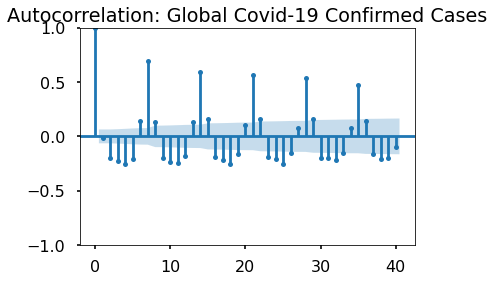

In [65]:
title = 'Autocorrelation: Global Covid-19 Confirmed Cases'
lags = 40
plot_acf(world_daily_diff ,title=title,lags=lags);

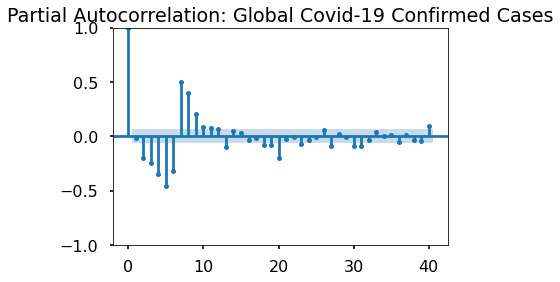

In [66]:
title = 'Partial Autocorrelation: Global Covid-19 Confirmed Cases'
lags = 40
plot_pacf(world_daily_diff,title=title,lags=lags);

### From the plots of the sequences ACF and PACF, obvious tailing or truncation can be found, which again confirms that this dataset is suitable for fitting with the ARIMA model.

### Use pmdarima.auto_arima to determine ARIMA Orders

In [67]:
l = len(world_daily)
stepwise_fit = auto_arima(world_daily['Daily New Confirmed'].iloc[:l-50], start_p=0, start_q=0,
                          max_p=3, max_q=3, m=3,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24133.598, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24135.598, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24135.600, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24131.628, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24055.590, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=23969.144, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=24084.087, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=23944.196, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=24050.392, Time=0.05 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=23617.335, Time=0.53 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=23670.037, Time=0.47 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=23670.796, Time=0.57 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=24142.117, Time=0.38 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=23614.366, Time=0.53 sec
 ARIMA(2,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  895
Model:               SARIMAX(3, 1, 2)   Log Likelihood              -11801.183
Date:                Fri, 26 Aug 2022   AIC                          23614.366
Time:                        07:31:17   BIC                          23643.141
Sample:                             0   HQIC                         23625.362
                                - 895                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9535      0.016     58.242      0.000       0.921       0.986
ar.L2         -0.6072      0.019    -31.170      0.000      -0.645      -0.569
ar.L3         -0.2766      0.016    -17.197      0.000      -0.308      -0.245
ma.L1         -1.3926      0.010   -146.272      0.000      -1.411      -1.374
ma.L2          0.8817      0.010     86.638      0.000       0.862       0.902
sigma2      1.869e+10   2.39e-13    7.8e+22      0.000    1.87e+10    1.87e+10
===================================================================================
Ljung-Box (L1) (Q):                   4.34   Jarque-Bera (JB):              8691.20
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):             112.60   Skew:                             1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.92e+37. Standard errors may be unstable.
"""

## Best model:  ARIMA(3,1,2). This suggests that we should fit an ARIMA(3,1,2) model to best forecast future values of the series.

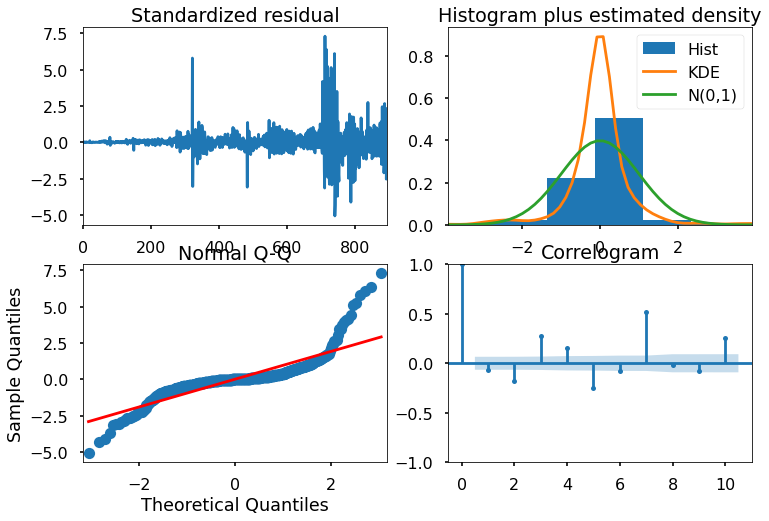

In [68]:
stepwise_fit.plot_diagnostics(figsize=(12,8))
plt.show()

### The diagnostics result is very good, it suggests that the data fits the model very well.

In [69]:
# Set 10 days as test
l = len(world_daily)
train = world_daily['Daily New Confirmed'].iloc[:l-10]
test = world_daily['Daily New Confirmed'].iloc[l-10:]
print(train)

Date
01/22/2020        557
01/23/2020        100
01/24/2020        287
01/25/2020        493
01/26/2020        683
               ...   
08/09/2022    1033122
08/10/2022    1011302
08/11/2022     994082
08/12/2022     747743
08/13/2022     634508
Name: Daily New Confirmed, Length: 935, dtype: int64


In [70]:
# Summary of the fitted ARIMA model.
model = ARIMA(train, order=(3,1,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Daily New Confirmed   No. Observations:                  935
Model:                  ARIMA(3, 1, 2)   Log Likelihood              -12373.525
Date:                 Fri, 26 Aug 2022   AIC                          24759.050
Time:                         07:31:18   BIC                          24788.086
Sample:                     01-22-2020   HQIC                         24770.122
                          - 08-13-2022                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9091      0.017     53.225      0.000       0.876       0.943
ar.L2         -0.5453      0.020    -27.069      0.000      -0.585      -0.506
ar.L3         -0.3253      0.017    -19.689      0.000      -0.358      -0.293
ma.L1         -1.3801      0.011   -129.553      0.000      -1.401      -1.359
ma.L2          0.8704      0.011     77.706      0.000       0.848       0.892
sigma2      2.028e+10   3.25e-13   6.24e+22      0.000    2.03e+10    2.03e+10
===================================================================================
Ljung-Box (L1) (Q):                   5.53   Jarque-Bera (JB):              6384.50
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):             109.45   Skew:                             1.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.06e+37. Standard errors may be unstable.
"""

In [71]:
# set the forecast to 10 days
n_forecast = len(test) + 10
pred = stepwise_fit.predict(n_forecast)

In [72]:
# Index the Dates
dates = pd.date_range(train.index[-1], periods=n_forecast)
dates = dates.strftime('%d/%m/%Y')
pred = pd.DataFrame(pred, index=dates)

In [73]:
df = pd.concat([train, test, pred], axis=1)

In [74]:
df.columns = ['Data Train', 'Data Test', 'Prediction']

In [75]:
df.head()

,Data Train,Data Test,Prediction
01/22/2020,557.0,NaN,NaN
01/23/2020,100.0,NaN,NaN
01/24/2020,287.0,NaN,NaN
01/25/2020,493.0,NaN,NaN
01/26/2020,683.0,NaN,NaN


In [76]:
df.tail()

,Data Train,Data Test,Prediction
27/08/2022,NaN,NaN,1.034301e+06
28/08/2022,NaN,NaN,1.110956e+06
29/08/2022,NaN,NaN,9.805573e+05
30/08/2022,NaN,NaN,7.449372e+05
31/08/2022,NaN,NaN,5.782497e+05


In [77]:
pd.options.plotting.backend = "plotly"

In [78]:
# plot predicted result
df.plot(x=df.index, y=['Data Train', 'Data Test', 'Prediction'])

In [79]:
# print the prediction in the form of numbers
pred.columns = ["Prediction of Daily New Confirmed Cases"]
pred.style.background_gradient(cmap='Reds')

,Prediction of Daily New Confirmed Cases
13/08/2022,1117916.047635
14/08/2022,1189344.215510
15/08/2022,976269.233982
16/08/2022,670125.156869
17/08/2022,487839.505158
18/08/2022,558851.966826
19/08/2022,821918.968582
20/08/2022,1080051.530820
21/08/2022,1146807.029649
22/08/2022,980962.123489


In [80]:
l = len(world_daily)
arima_train = world_daily['Daily New Confirmed'].iloc[:l-50]
arima_test = world_daily['Daily New Confirmed'].iloc[l-50:]
#print(arima_test)

In [81]:
# r^2 calculation
from sklearn.metrics import r2_score
n_forecast=len(arima_test)
arima_pred = stepwise_fit.predict(n_forecast)
r2_score(arima_test,arima_pred)

0.45816008892996163

## 3. Bayesian Ridge Regression Model Building and Prediction

In [82]:
dates = confirmed.keys()
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [83]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [84]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
days_to_skip = 790
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since[days_to_skip:], world_cases[days_to_skip:], test_size=0.08, shuffle=False) 

In [85]:
# transform our data for further regression
bayesian_poly = PolynomialFeatures(degree=3)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [86]:
# bayesian ridge regression modeling
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 
                 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', 
                    cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), BayesianRidge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: Fut

RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)


If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), BayesianRidge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warnin

In [87]:
bayesian_search.best_params_

{'tol': 1e-05,
 'normalize': False,
 'lambda_2': 0.001,
 'lambda_1': 0.001,
 'alpha_2': 0.0001,
 'alpha_1': 1e-07}

In [88]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 82655808.22822677
MSE: 6858669389374219.0


In [89]:
# r^2 calculation
from sklearn.metrics import r2_score
r2_score(world_cases, bayesian_pred[:-10])

0.9450312646249265

In [90]:
# Future predictions using Bayesian Ridge 
bayesian_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Bayesian Ridge Predicted # Confirmed Globally': np.round(bayesian_pred[-10:])})
bayesian_df.style.background_gradient(cmap='Reds')

,Date,Bayesian Ridge Predicted # Confirmed Globally
0,08/24/2022,690942269.000000
1,08/25/2022,693137991.000000
2,08/26/2022,695338360.000000
3,08/27/2022,697543381.000000
4,08/28/2022,699753059.000000
5,08/29/2022,701967398.000000
6,08/30/2022,704186404.000000
7,08/31/2022,706410081.000000
8,09/01/2022,708638435.000000
9,09/02/2022,710871470.000000
